# **Solar Data Discovery** 

## **Benin Data Profiling, Cleaning, and EDA**

In [1]:
import sys
import os
import matplotlib as plt
import importlib
system_path = os.path.abspath('..')
if system_path in sys.path:
    print('Path already exist')
else:
    sys.path.append(system_path)

In [2]:
%load_ext autoreload
%autoreload 2
import importlib
from scripts import data_analysis
importlib.reload(data_analysis)


<module 'scripts.data_analysis' from 'd:\\10Acadamy\\solar-challenge-week0\\scripts\\data_analysis.py'>

In [3]:
data = data_analysis.load_data('../data/benin-malanville.csv')

In [4]:
data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [5]:
from scripts.data_analysis import *

# Check for missing values
missing_values = check_missing_values(data)
print("Missing Values Count:")
print(missing_values)

# Specify columns for cleaning and outlier detection
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Clean the data
cleaned_df = clean_data(data, columns_to_check)

# Print cleaned data info
print("\nCleaned Data Summary:")
print(cleaned_df.describe())

Missing Values Count:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Cleaned Data Summary:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%

In [6]:
# Specify columns for Z-score computation and cleaning
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Clean the data
cleaned_df = clean_data(data, columns_to_check)

# Compute Z-scores
z_scores = compute_z_scores(cleaned_df, columns_to_check)

# Flag outliers
outlier_flags = flag_outliers(z_scores)

# Print flagged rows
print("\nFlagged Outlier Rows:")
print(cleaned_df[outlier_flags])


Flagged Outlier Rows:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev     WD  WDs

## Exporting The Ceaned Dataset and saving as sierraleone_clean.csv

In [7]:
cleaned_df.to_csv("../data/benin_clean.csv", index =False)

In [8]:
import matplotlib.pyplot as plt
print(cleaned_df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


# Time Series Analysis
## Line charts of GHI, DNI, DHI, Tamb vs. Timestamp. with script call

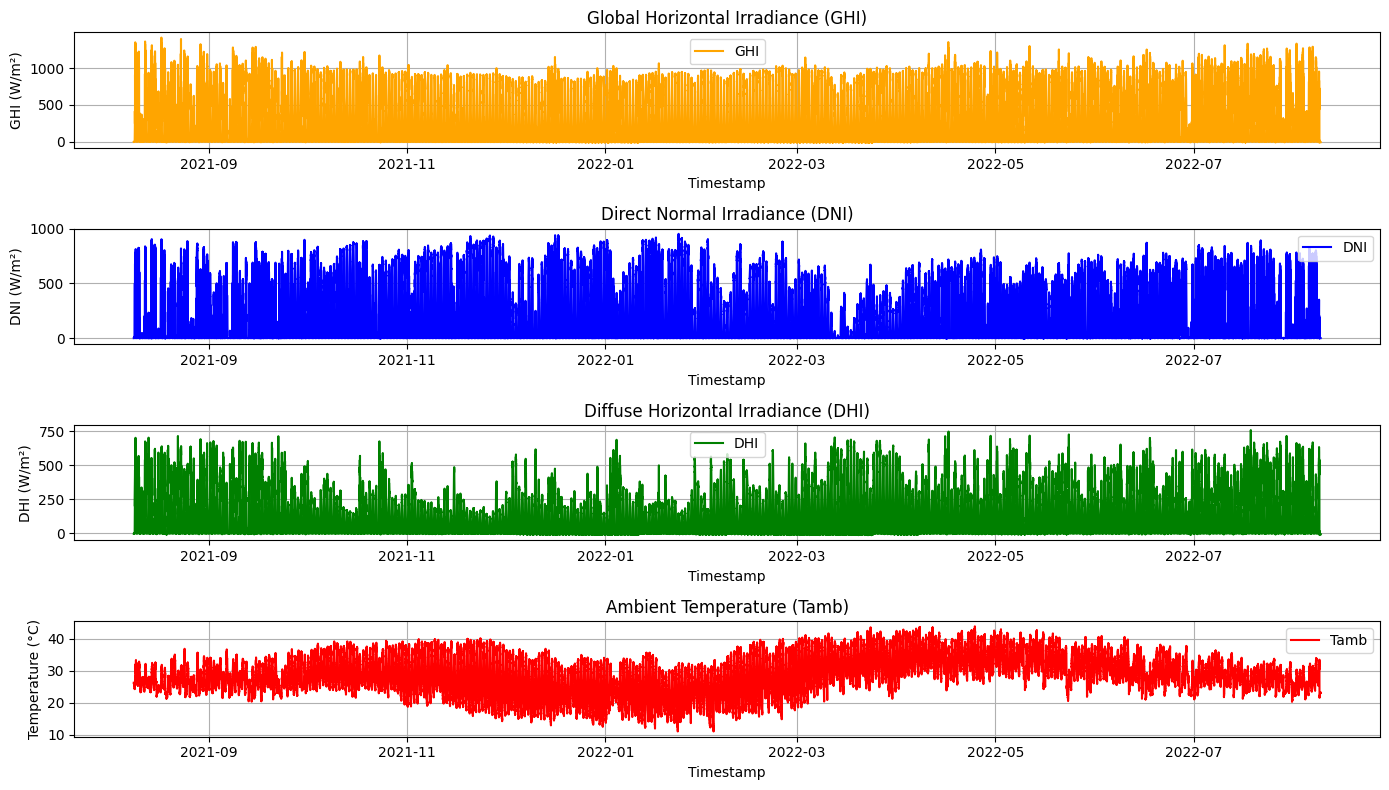

In [9]:
plot_time_series(cleaned_df)

# Time Series Analysis
## Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.

d:\10Acadamy\solar-challenge-week0\scripts\data_analysis.py:105: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


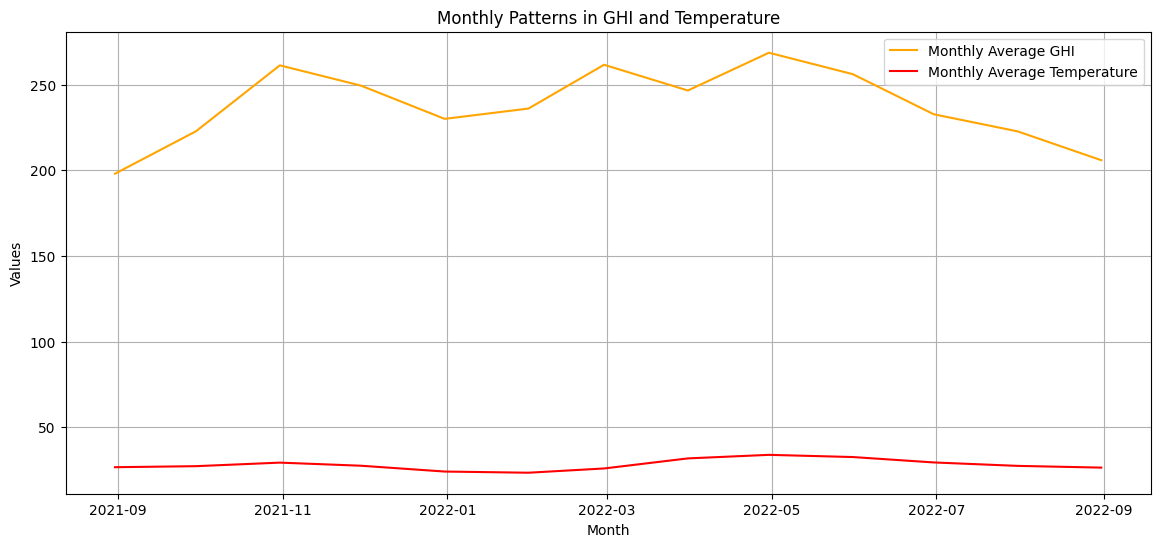

In [10]:
plot_monthly_patterns(cleaned_df)

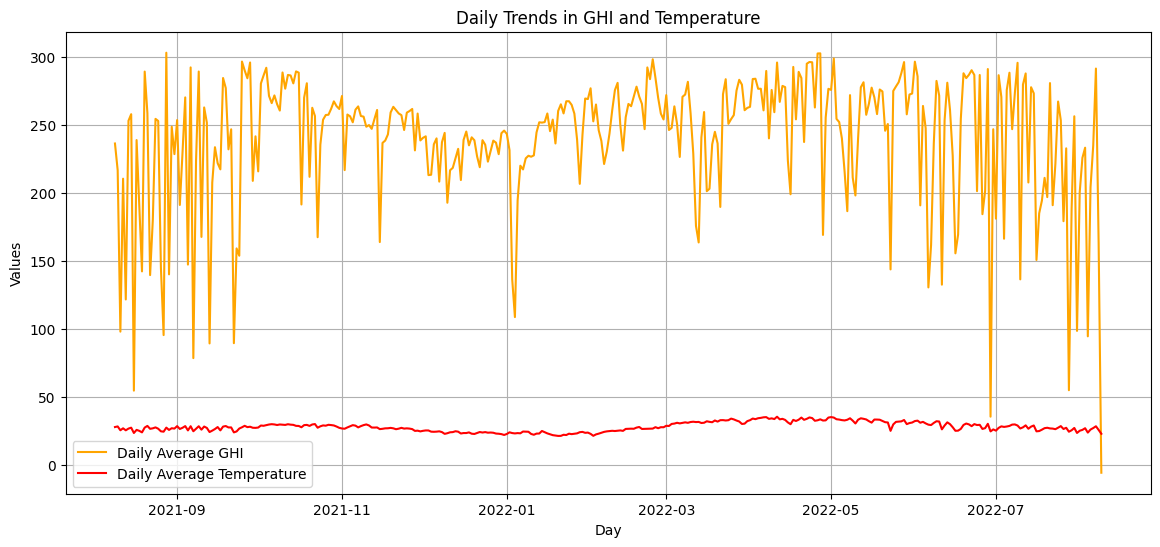

In [11]:
plot_daily_trends(cleaned_df)

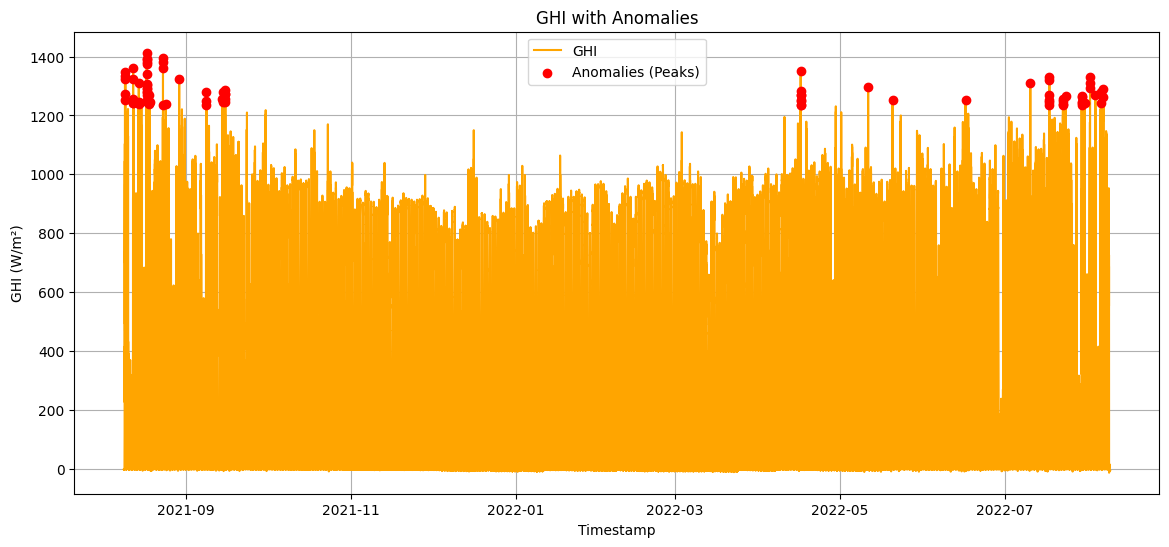

In [12]:
detect_anomalies(cleaned_df)

Available columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


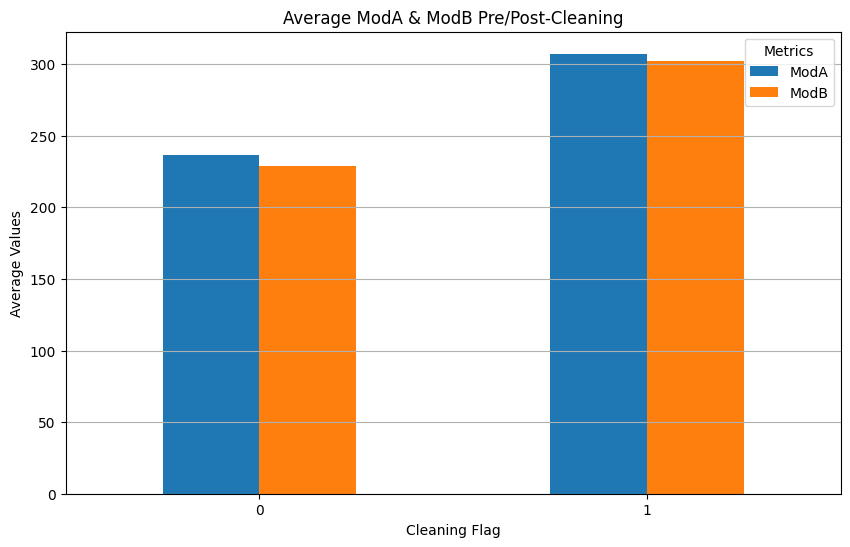

In [13]:
plot_cleaning_impact(cleaned_df)

# Correlation & Relationship Analysis

## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

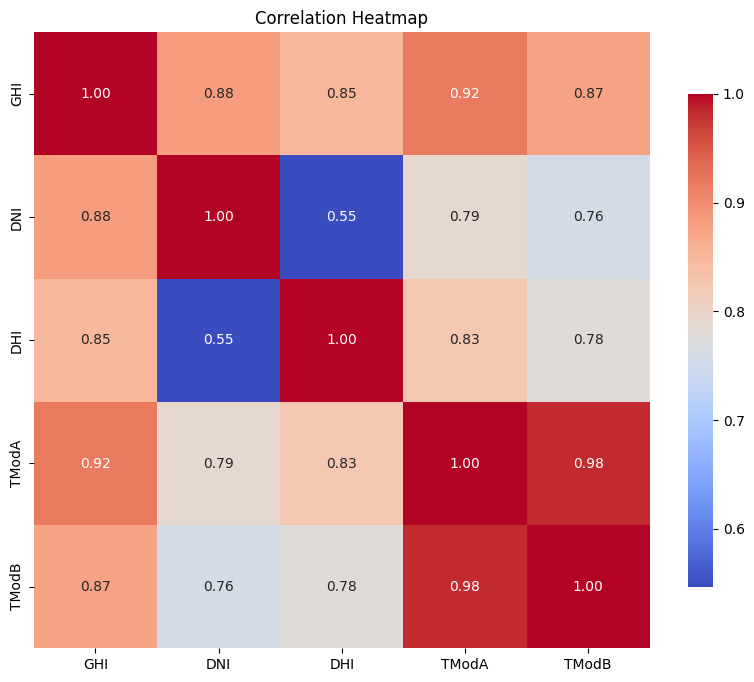

In [14]:
plot_correlation_heatmap(cleaned_df)

## Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

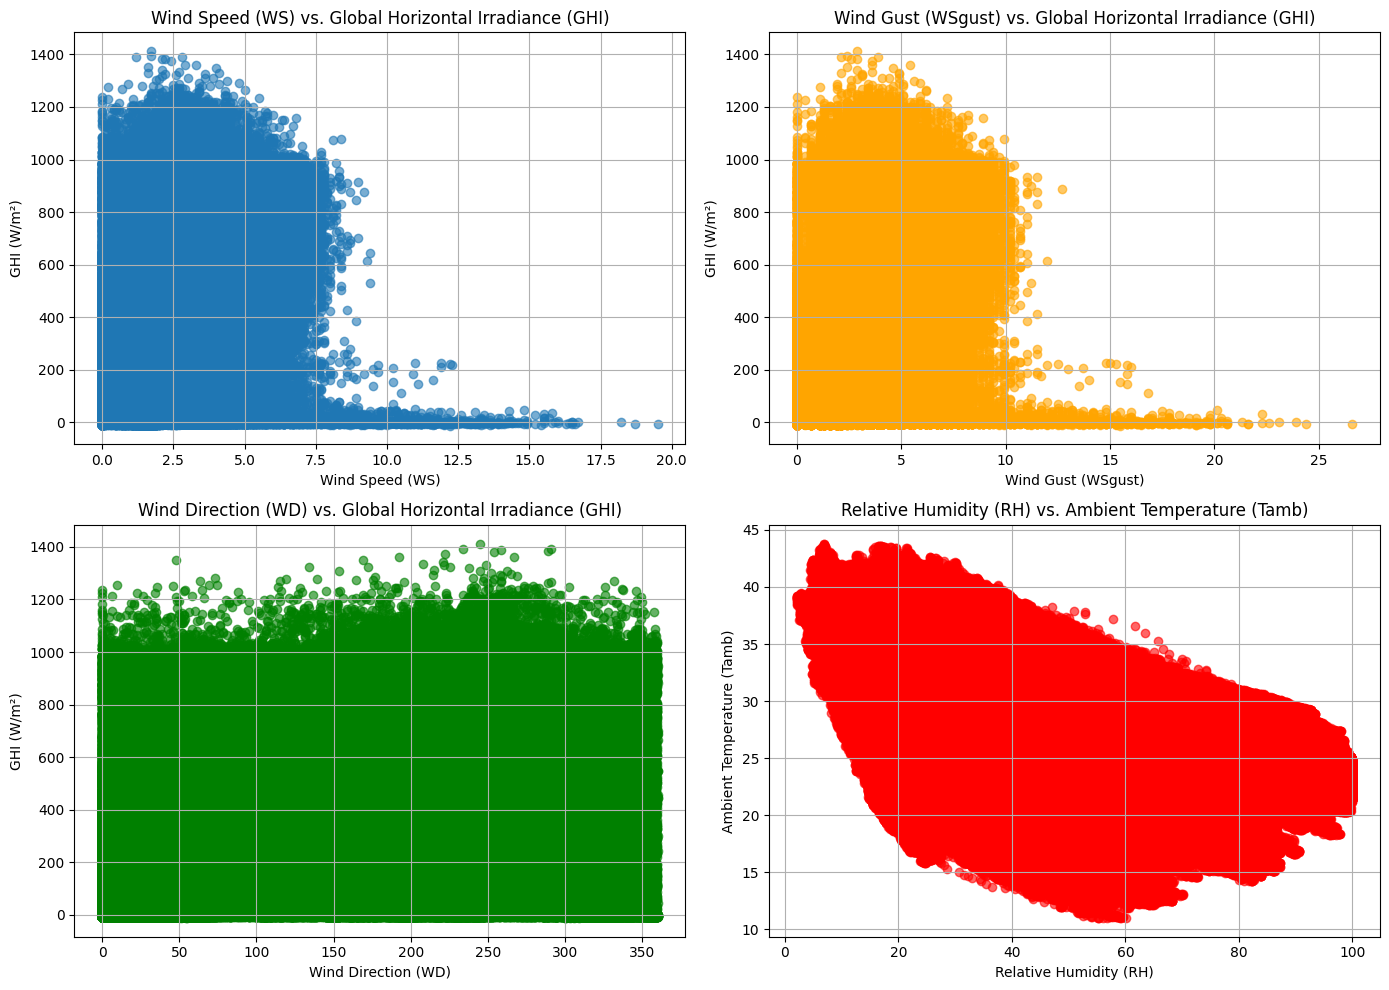

In [15]:
plot_scatter_plots(cleaned_df)

# Wind & Distribution Analysis
## Wind rose or radial bar plot of WS/WD.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (35,) and arg 1 with shape (20,).

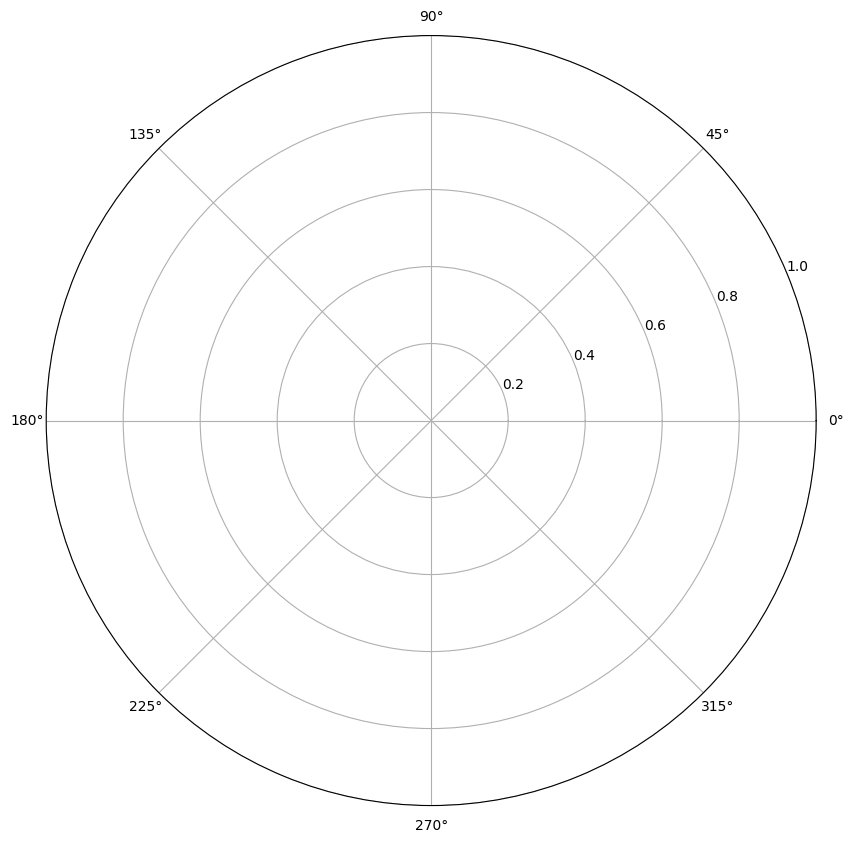

In [16]:
plot_wind_rose(cleaned_df)

# Wind & Distribution Analysis
## Histograms for GHI and one other variable (e.g. WS).

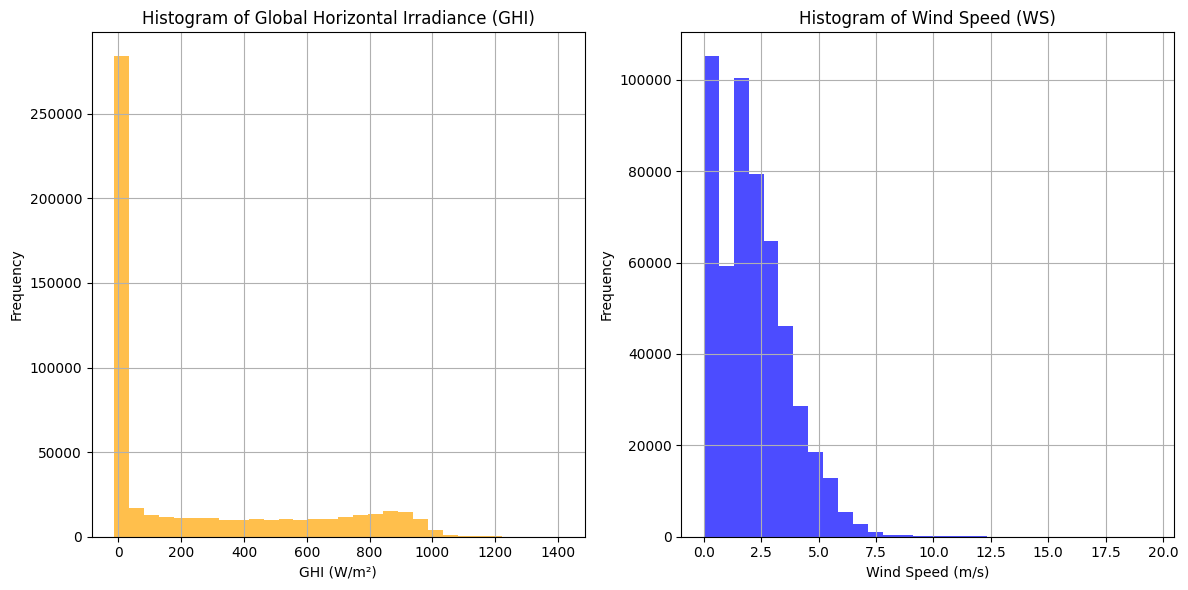

In [17]:
plot_histograms(cleaned_df)

# Temperature Analysis
## Examine how relative humidity (RH) might influence temperature readings and solar radiation.


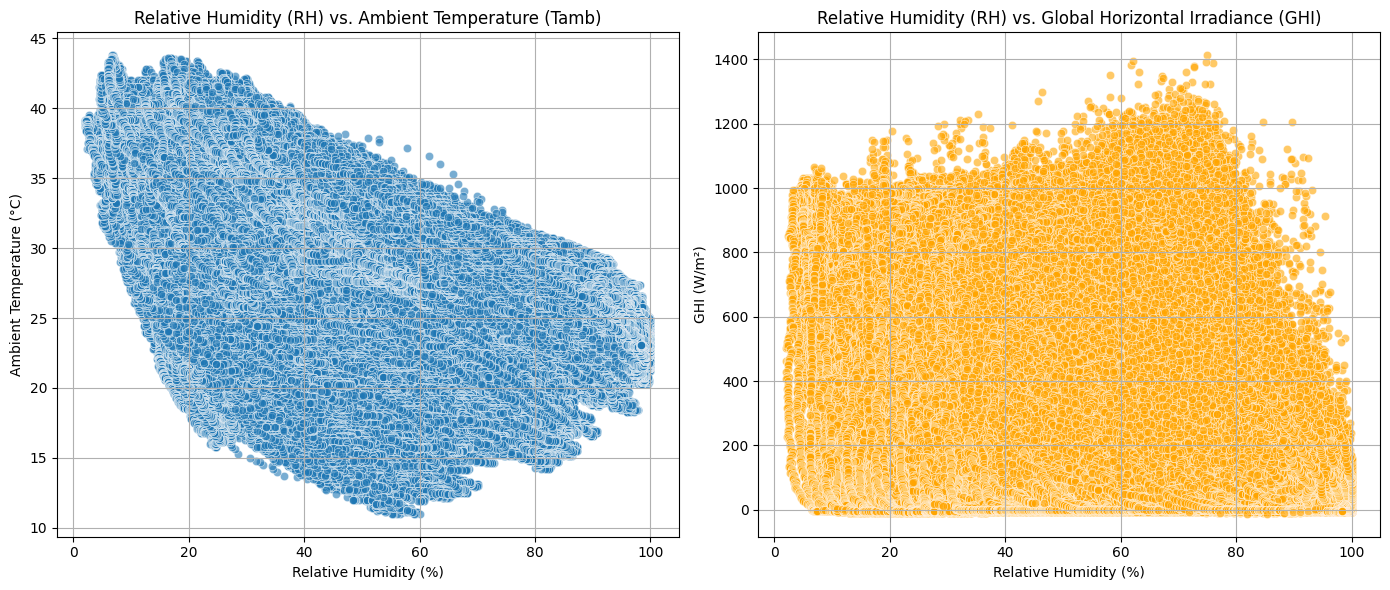

In [18]:
plot_relationships(cleaned_df)

In [19]:
calculate_correlations(cleaned_df)

Correlation between RH and Tamb: -0.41
Correlation between RH and GHI: -0.36


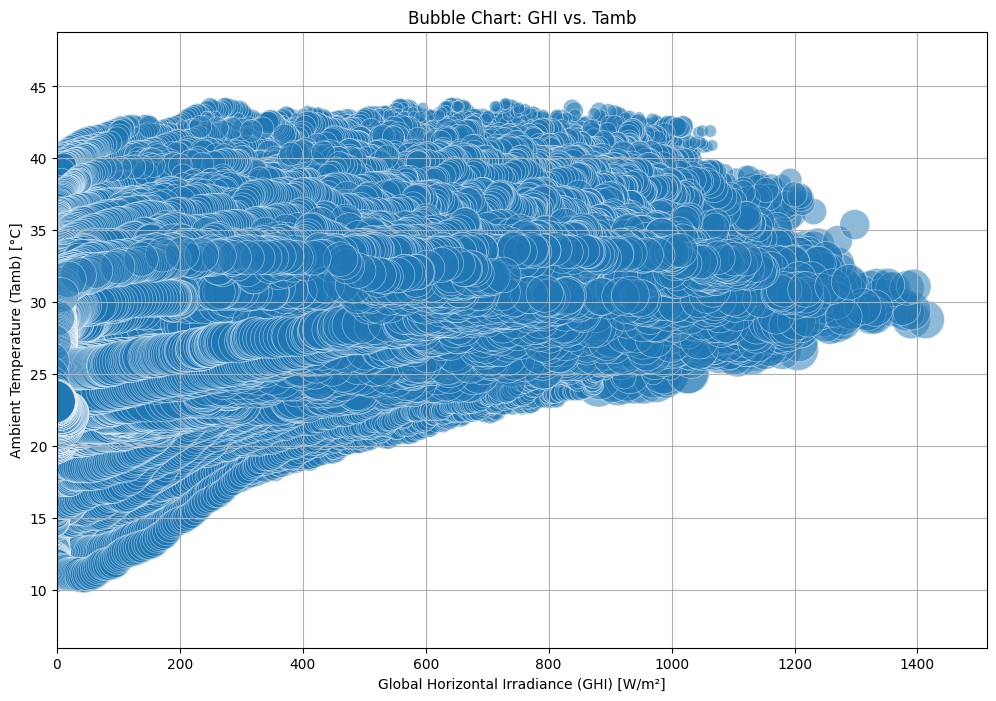

In [21]:
plot_bubble_chart(cleaned_df)

## Below Are Old Files
